In [45]:
import sys
!{sys.executable} -m pip install vaderSentiment

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
data=pd.read_csv("C://Users//Lekha//Downloads//twitter_data.csv")

In [3]:
data.shape

(9554, 3)

In [4]:
data.head()

,Unnamed: 0,tweets_createdat,tweets
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma..."
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,..."
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...


In [5]:
data.rename(columns = {'Unnamed: 0':'Tweet_ID','tweets_createdat':'Tweet_Date','tweets':'Tweet'}, inplace = True) 

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [7]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['Tweet'], "@[\w]*")

In [8]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,RT : BREAKING: UK #coronavirus deaths surge ag...
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...","RT : The millions of unemployed, small and med..."
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...","RT : In his address to the nation, PM urged e..."
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,RT : New member #coronavirus fund hopes to ra...
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,Of course you Pakistani people are helping ...


In [9]:
# remove special characters, numbers, punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [10]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,RT BREAKING UK #coronavirus deaths surge ag...
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...",RT The millions of unemployed small and med...
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...",RT In his address to the nation PM urged e...
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,RT New member #coronavirus fund hopes to ra...
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,Of course you Pakistani people are helping ...


In [11]:
#Removing short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,BREAKING #coronavirus deaths surge again This ...
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...",millions unemployed small medium sized busines...
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...",address nation urged every citizen download #A...
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,member #coronavirus fund hopes raise from unsp...
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,course Pakistani people helping each other thi...


In [13]:
#Tokenization
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [BREAKING, #coronavirus, deaths, surge, again,...
1    [millions, unemployed, small, medium, sized, b...
2    [address, nation, urged, every, citizen, downl...
3    [member, #coronavirus, fund, hopes, raise, fro...
4    [course, Pakistani, people, helping, each, oth...
Name: clean_tweet, dtype: object

In [14]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [break, #coronaviru, death, surg, again, thi, ...
1    [million, unemploy, small, medium, size, busi,...
2    [address, nation, urg, everi, citizen, downloa...
3    [member, #coronaviru, fund, hope, rais, from, ...
4    [cours, pakistani, peopl, help, each, other, t...
Name: clean_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['clean_tweet'] = tokenized_tweet

In [16]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,break #coronaviru death surg again thi doesn i...
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...",million unemploy small medium size busi owner ...
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...",address nation urg everi citizen download #aar...
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,member #coronaviru fund hope rais from unspent...
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,cours pakistani peopl help each other thi appr...


In [17]:
import sys
!{sys.executable} -m pip install wordcloud

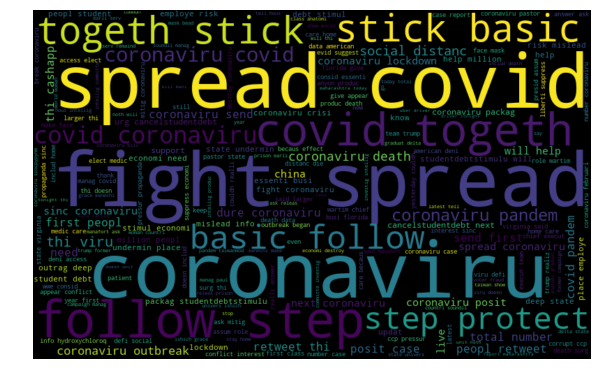

In [18]:
all_words = ' '.join([text for text in data['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:
HT = hashtag_extract(data['clean_tweet'])
HT

[['coronaviru'],
 [],
 ['aarogyasetu'],
 ['coronaviru', 'suppo'],
 ['coronaviru'],
 ['coronavir'],
 ['positiveswbrum',
  'northfield',
  'hollymoor',
  'covid',
  'coronaviru',
  'commun',
  'nhsthankyou'],
 ['sentencestori',
  'flashfict',
  'coronaviru',
  'coronavirushorror',
  'halloween',
  'horror',
  'halloween'],
 ['coronaviru'],
 [],
 ['ontario', 'canada', 'coronaviru'],
 ['webinar', 'disinform', 'coronaviru'],
 [],
 ['covid', 'coronaviru'],
 ['coronaviru'],
 [],
 ['covid', 'coronaviru'],
 [],
 ['universalcredit', 'coronaviru'],
 ['taiwan', 'covid', 'taiwanmod'],
 [],
 ['covid', 'humanright', 'wwiii', 'coronaviru'],
 ['swiss', 'coronaviru', 'coronainfoch', 'coronavirusswitzerland'],
 ['boom',
  'covid',
  'wwg',
  'qanon',
  'herewego',
  'mediali',
  'msm',
  'fakenewsmedia',
  'fakenew',
  'cnnistrash',
  'coronaviru',
  'covid'],
 ['coronaviru'],
 [],
 ['coronaviru'],
 [],
 [],
 ['firefauci', 'antho'],
 [],
 ['coronaviru'],
 [],
 ['covid', 'coronaviru'],
 ['covid', 'coronav

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lekha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\Lekha\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [22]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [23]:
print_sentiment_scores("Corona is bad") #Compound value scale = -1 to 1 (-ve to +ve)

Corona is bad--------------------------- {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}


In [24]:
i=0

Vader_Score = []  #empty list to hold our computed 'compound' VADER scores
while (i<len(data)):
    k = analyser.polarity_scores(data.iloc[i]['Tweet'])
    Vader_Score.append(k['compound'])
    i = i+1

Vader_Score = np.array(Vader_Score)

len(Vader_Score)

9554

In [25]:
data['VADER score'] = Vader_Score

In [26]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet,VADER score
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,break #coronaviru death surg again thi doesn i...,0.4939
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...",million unemploy small medium size busi owner ...,0.0000
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...",address nation urg everi citizen download #aar...,0.3400
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,member #coronaviru fund hope rais from unspent...,0.7096
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,cours pakistani peopl help each other thi appr...,0.8917


In [27]:
i = 0

predicted_value = []

while(i<len(data)):
    if ((data.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((data.iloc[i]['VADER score'] > 0) & (data.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((data.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

In [28]:
data['Sentiment'] = predicted_value

In [29]:
data.head()

,Tweet_ID,Tweet_Date,Tweet,clean_tweet,VADER score,Sentiment
0,0,2020-04-14 15:31:59,RT @piersmorgan: BREAKING: UK #coronavirus dea...,break #coronaviru death surg again thi doesn i...,0.4939,neutral
1,1,2020-04-14 15:31:59,"RT @TomFitton: The millions of unemployed, sma...",million unemploy small medium size busi owner ...,0.0000,negative
2,2,2020-04-14 15:31:59,"RT @SetuAarogya: In his address to the nation,...",address nation urg everi citizen download #aar...,0.3400,neutral
3,3,2020-04-14 15:31:59,RT @PFGltd: New @coopuk member #coronavirus fu...,member #coronaviru fund hope rais from unspent...,0.7096,positive
4,4,2020-04-14 15:31:59,@YousafSavira @DVATW @ImranKhanPTI Of course y...,cours pakistani peopl help each other thi appr...,0.8917,positive


In [59]:
data.to_csv('Twitter_Data_Cleaned.csv')

TOPIC MODELING

In [37]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = vectorizer_.fit_transform(data['Tweet'])

<input>:4: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<ipython-input-37-265caaf19127>:4: DeprecationWarning: invalid escape sequence \-
  vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


In [32]:
import sys
!{sys.executable} -m pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=96450 sha256=a3e880913710c145af94e820e234bed85921ecc1b3eaad3404c4b99d7a30d227
  Stored in directory: c:\users\lekha\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491098 sha256=f9db4a3d7f39d8bf411e7568b2d6165d7c8755732d961ab8aeba31945cb5ca0e
  Stored in directory: c:\users\lekha\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32058 sha256=eedf12739e0502383c682de76dac508f9edeb72914f5122535e97acde8dab87a
  Stored in directory: c:\users\lekha\appdata\local\pip\cache\wheels\3c\33\97\805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built pyLDAvis future funcy


In [38]:
lda_ = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
tweets_lda = lda_.fit_transform(tweets_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [39]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [40]:
print("Tweets LDA Model:")
selected_topics(lda_, vectorizer_)

Tweets LDA Model:
Topic 0:
[('coronavirus', 647.5740077765344), ('https', 354.36926846256875), ('india', 248.47565207488714), ('world', 210.13565628752298), ('amp', 203.32897044044833), ('country', 191.97412498941787), ('taiwan', 189.84538177877627), ('lockdown', 172.9303320491194), ('covid', 163.8865317003337), ('pandemic', 147.92997095466822)]
Topic 1:
[('coronavirus', 1169.3013905969844), ('https', 531.6955682504396), ('cases', 506.41974490015815), ('covid', 478.38425573728233), ('deaths', 289.08873269757396), ('total', 283.8251263344798), ('new', 274.69054421928325), ('today', 244.00852488551737), ('number', 228.20462902437322), ('positive', 210.8023155677375)]
Topic 2:
[('coronavirus', 366.2014195316928), ('china', 166.04014551038875), ('latest', 160.45254441482444), ('intelligence', 144.2543326042678), ('covid', 133.6013451722508), ('april', 130.8874089040291), ('house', 112.27318194349347), ('end', 93.64680434687573), ('investigating', 92.0487126052788), ('tells', 89.28780363317

In [41]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_, tweets_vectorized, vectorizer_, mds='tsne')
dash

C:\Users\Lekha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  17.014080
1       0.648955  71.707100       2        1  12.480775
4      71.019684   9.971006       3        1  10.084074
0       3.785981  33.185135       4        1   9.744115
2     -42.666500  -9.222070       5        1   9.459148
7      -3.621689 -43.526516       6        1   9.388705
3      -3.632402  -4.171708       7        1   9.131928
9     -36.584400  35.804413       8        1   8.522063
5      44.391380  50.615383       9        1   7.306647
6      40.235809 -31.591665      10        1   6.868465, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
2658  Default   869.000000           spread   869.000000  30.0000  30.0000
1043  Default   852.000000            fight   852.000000  29.0000  29.0000
626   Default   976.000000           covid-   976.000000  28.0000  28.0000
1339  Default  2739.000000            https  2739.000000  27.0000  27.0000
1076  Default   739.000000           follow   739.000000  26.0000  26.0000
2210  Default   733.000000          protect   733.000000  25.0000  25.0000
2699  Default   698.000000            steps   698.000000  24.0000  24.0000
226   Default   691.000000           basics   691.000000  23.0000  23.0000
2704  Default   689.000000         sticking   689.000000  22.0000  22.0000
2948  Default   494.000000            trump   494.000000  21.0000  21.0000
625   Default  1937.000000            covid  1937.000000  20.0000  20.0000
391   Default   493.000000            cases   493.000000  19.0000  19.0000
2293  Default   482.000000  realdonaldtrump   482.000000  18.0000  18.0000
107   Default  1063.000000              amp  1063.000000  17.0000  17.0000
3066  Default   325.000000            virus   325.000000  16.0000  16.0000
1628  Default   298.000000             like   298.000000  15.0000  15.0000
2619  Default   255.000000           social   255.000000  14.0000  14.0000
2677  Default   395.000000            state   395.000000  13.0000  13.0000
2896  Default   398.000000        tomfitton   398.000000  12.0000  12.0000
2007  Default   576.000000         pandemic   576.000000  11.0000  11.0000
688   Default   544.000000           deaths   544.000000  10.0000  10.0000
1411  Default   282.000000            india   282.000000   9.0000   9.0000
380   Default   348.000000             care   348.000000   8.0000   8.0000
2905  Default   329.000000            total   329.000000   7.0000   7.0000
785   Default   201.000000       distancing   201.000000   6.0000   6.0000
868   Default   301.000000          economy   301.000000   5.0000   5.0000
2160  Default   221.000000        president   221.000000   4.0000   4.0000
1278  Default   365.000000             help   365.000000   3.0000   3.0000
3165  Default   276.000000            world   276.000000   2.0000   2.0000
1980  Default   196.000000         outbreak   196.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
127   Topic10   101.292498           answer   102.160267   2.6697  -4.1978
607   Topic10   100.063404           couldn   100.931142   2.6696  -4.2101
175   Topic10    93.670402            asked    94.538139   2.6690  -4.2761
2678  Topic10    92.846823           states    93.714689   2.6689  -4.2849
1569  Topic10    88.037382              lab    88.905544   2.6684  -4.3381
894   Topic10    86.146682        employees    87.014436   2.6682  -4.3598
2751  Topic10    85.974643         suggests    86.842372   2.6682  -4.3618
2854  Topic10    84.305195  thedemcoalition    85.172920   2.6680  -4.3814
1806  Topic10    84.182753         mitigate    85.050480   2.6680  -4.3829
408   Topic10    80.300327           cdcgov    81.168182   2.6675  -4.4301
2508  Topic10    80.173465        secretary    81.041328   2